In [19]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# data load, preprocessing
data = pd.read_csv('./dataset.txt', sep = ",",)
texts = data['text_column']
labels = data['label_column']


In [20]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=100)

In [21]:
# multiclass label prepare
from keras.utils import to_categorical
y = to_categorical(labels, num_classes=4)  # amount of class

Epoch 1/5
8/8 [==============================] - 2s 104ms/step - loss: 1.3713 - accuracy: 0.3761 - val_loss: 1.3400 - val_accuracy: 0.5417
Epoch 2/5
8/8 [==============================] - 0s 56ms/step - loss: 1.3097 - accuracy: 0.5672 - val_loss: 1.2682 - val_accuracy: 0.5750
Epoch 3/5
8/8 [==============================] - 0s 55ms/step - loss: 1.1997 - accuracy: 0.6513 - val_loss: 1.1329 - val_accuracy: 0.6417
Epoch 4/5
8/8 [==============================] - 0s 55ms/step - loss: 0.9735 - accuracy: 0.7584 - val_loss: 0.9161 - val_accuracy: 0.6167
Epoch 5/5
8/8 [==============================] - 0s 54ms/step - loss: 0.6797 - accuracy: 0.8550 - val_loss: 0.6644 - val_accuracy: 0.8583
{'loss': [1.3712983131408691, 1.3097151517868042, 1.1996656656265259, 0.9734558463096619, 0.6796684861183167], 'accuracy': [0.3760504126548767, 0.5672268867492676, 0.651260495185852, 0.7584033608436584, 0.855042040348053], 'val_loss': [1.3400441408157349, 1.2682431936264038, 1.1329443454742432, 0.91608583927

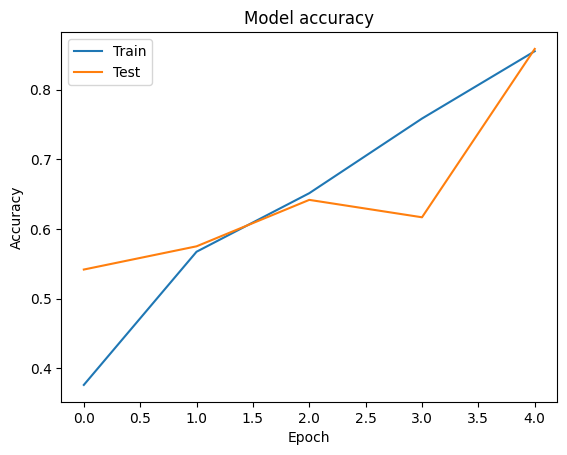

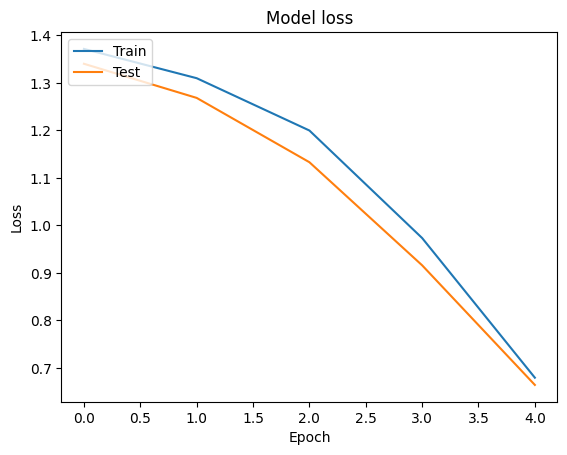

5/5 [==============================] - 0s 12ms/step - loss: 0.6491 - accuracy: 0.8200
Loss: 0.6490706205368042, Accuracy: 0.8199999928474426
학습된 모델이 저장되었습니다.


c:\Users\dargu\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
# data divising
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model structure
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
model.add(LSTM(64))
model.add(Dense(4, activation='softmax'))  # print softmax of 4 class

# compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)
print(history.history)

# training visualizing (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#training visualizing (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# model save
model.save('./recog_situation_model.h5')
print("학습된 모델이 저장되었습니다.")